In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('gold.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

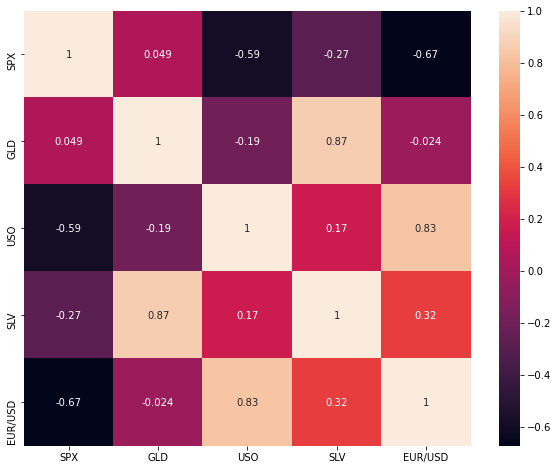

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLV', ylabel='GLD'>

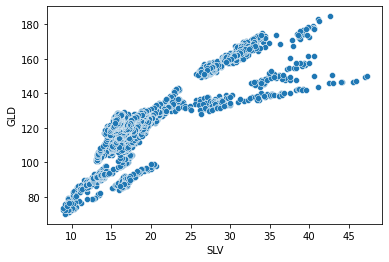

In [9]:
sns.scatterplot(df['SLV'],df['GLD'])

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLV', ylabel='GLD'>

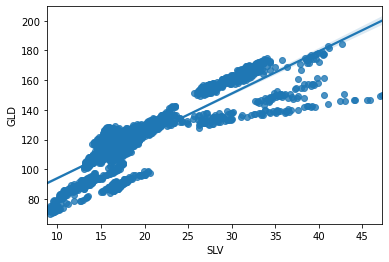

In [10]:
sns.regplot(df['SLV'],df['GLD'])

In [11]:
df['Date'].unique()

array(['1/2/2008', '1/3/2008', '1/4/2008', ..., '5/10/2018', '5/14/2018',
       '5/16/2018'], dtype=object)

In [12]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [13]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [15]:
x_test.size

1832

In [16]:
y_test.size

458

In [17]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
predicted_y=model.predict(x_test)
predicted_y

array([163.67010046, 127.59419897, 124.27629935, 119.52309891,
       125.95929928,  86.87889798, 171.89570158, 137.92980041,
       106.82420047, 133.41280173, 120.5654994 , 124.79200042,
       143.49199795, 104.5049998 ,  80.76529921, 119.2523999 ,
       140.02960022,  90.35140077,  91.43379964, 128.2762025 ,
       125.69289985, 147.94990015, 116.64210196, 153.07889894,
       129.36149879, 129.49920174, 117.89190139, 111.46000047,
       168.27030181, 157.65689807, 126.05500149, 153.85800126,
       127.04749937, 122.52219796, 116.38780157, 154.7055997 ,
       114.98880007, 120.49640137, 104.07510223, 105.49550041,
       135.88729948,  85.79619971, 156.50600038, 121.32809996,
       122.24740059, 155.17680109, 120.5019    , 116.62430015,
       168.73400277, 116.80950048, 138.03650284, 162.09059855,
       159.04170095, 153.0534007 , 124.15220034, 117.06430017,
       167.35300025, 117.18259977, 165.73390041,  84.00910005,
       121.41469876, 122.03060019, 120.16140006, 172.08

In [19]:
from sklearn import metrics
r2=metrics.r2_score(y_test,predicted_y)
r2

0.9855332970254862

Text(0.5, 1.0, 'Actual vs Predicted values')

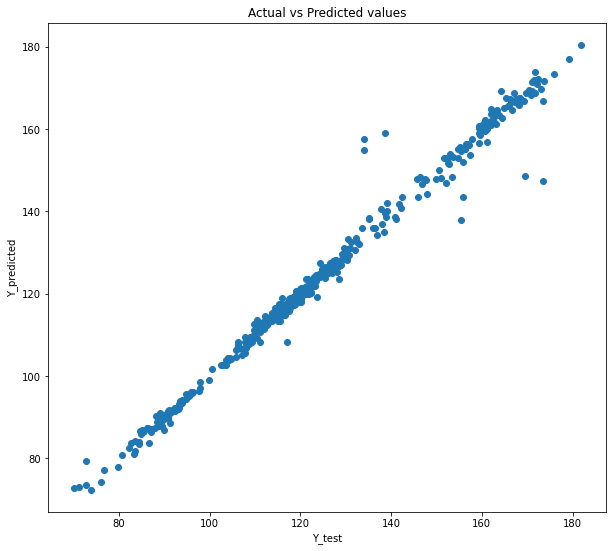

In [22]:
plt.figure(figsize=(10,9))
plt.scatter(y_test,predicted_y)
plt.xlabel('Y_test')
plt.ylabel('Y_predicted')
plt.title('Actual vs Predicted values')

Text(0, 0.5, 'Actual Selling Price')

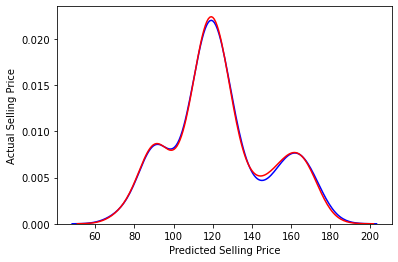

In [29]:
sns.kdeplot(predicted_y,color='red',ax=sns.kdeplot(y_test,color='blue',))
plt.xlabel("Predicted Selling Price")
plt.ylabel('Actual Selling Price')